# 'virtual' 이라는 검색어에 대한 해외 논문 1000개에 대하여 말뭉치 생성

In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import nltk 

## 1. riss 10 pages download

In [2]:
all_files = glob.glob('./data_list2/my*.xls')
all_files

['./data_list2\\myCabinetExcelData (1).xls',
 './data_list2\\myCabinetExcelData (2).xls',
 './data_list2\\myCabinetExcelData (3).xls',
 './data_list2\\myCabinetExcelData (4).xls',
 './data_list2\\myCabinetExcelData (5).xls',
 './data_list2\\myCabinetExcelData (6).xls',
 './data_list2\\myCabinetExcelData (7).xls',
 './data_list2\\myCabinetExcelData (8).xls',
 './data_list2\\myCabinetExcelData (9).xls',
 './data_list2\\myCabinetExcelData.xls']

## 2. read excel_files --> list[df, df, df, ..]

In [3]:
df_all = []

In [4]:
for file in all_files:
    df = pd.read_excel(file)
    df_all.append(df)
len(df_all)

10

## 3. df_all ←- list[df, df, df] concat, save csv!

In [5]:
df_all_concat = pd.concat(df_all,
                          axis=0, # row 병합
                          ignore_index=True
                          )
df_all_concat.tail(2)

,Unnamed: 0,번호,제목,저자,출판사,출판일
998,NaN,99,Teaching Virtual Reality: When and How?,"Darken, R.; Burdea, G.; Sherman, W.; Stone, R.","IEEE,",2004
999,NaN,100,Testbed Evaluation of Navigation and Text Disp...,"Chen, J.; Pyla, P.; Bowman, D.","IEEE,",2004


In [6]:
df_all_concat.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
df_all_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      1000 non-null   int64 
 1   제목      1000 non-null   object
 2   저자      1000 non-null   object
 3   출판사     1000 non-null   object
 4   출판일     1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [8]:
df_all_concat.to_csv('./data_list2/virtual_riss.csv',
                     encoding='utf8',
                     index=False
                     )

In [9]:
df1000 = pd.read_csv('./data_list2/virtual_riss.csv', encoding='utf8')
df1000[:2]

,번호,제목,저자,출판사,출판일
0,1,Virtual Learning Environments,"Veirum, N.",DCEA,1995
1,2,Prospects and Challenges for Creating Historic...,"Severson, J.",IOS,2001


## 4. extract title column!

In [10]:
all_titles = df1000['제목']
all_titles[:5]

0                        Virtual Learning Environments
1    Prospects and Challenges for Creating Historic...
2              Virtual Environments Loggins Using BITS
3                                     Virtual GIS Room
4          Teaching with Immersive Virtual Archaeology
Name: 제목, dtype: object

## 5. preprocessing all_title ⇒ to words list

### 1) english start words → to list

In [11]:
stopwords = set(stopwords.words('english'))

### 2) word_tokenize(lower())   
### 3) stopwords processing   
### 4) lemmatize process

In [12]:
lemma = WordNetLemmatizer()

In [13]:
words = []

for title in all_titles:
    # 글자가 아닌 것은 공백으로 대체
    prel = re.sub(r"[^a-zA-Z]+", " ", str(title))
    # 2) word_tokenize(lower())
    prel_lower_token = word_tokenize(prel.lower())
    # 3) stopwords processing
    pre2 = [w for w in prel_lower_token if w not in stopwords]
    ## 4) lemmatize process
    pre3 = [lemma.lemmatize(w) for w in pre2]
    words.append(pre3)

In [14]:
words

[['virtual', 'learning', 'environment'],
 ['prospect',
  'challenge',
  'creating',
  'historic',
  'virtual',
  'environment',
  'museum',
  'exhibition'],
 ['virtual', 'environment', 'loggins', 'using', 'bit'],
 ['virtual', 'gi', 'room'],
 ['teaching', 'immersive', 'virtual', 'archaeology'],
 ['affective', 'property', 'evaluation', 'virtual', 'product', 'design'],
 ['virtual',
  'augmented',
  'reality',
  'cultural',
  'computing',
  'heritage',
  'case',
  'study',
  'virtual',
  'exploration',
  'underwater',
  'archaeological',
  'site',
  'preprint'],
 ['conservation',
  'preservation',
  'heritage',
  'site',
  'sri',
  'lanka',
  'virtual',
  'heritage'],
 ['persuade',
  'perish',
  'moving',
  'virtual',
  'heritage',
  'beyond',
  'pretty',
  'picture',
  'past'],
 ['psychophysics',
  'technology',
  'dimensional',
  'virtual',
  'acoustic',
  'display'],
 ['digital', 'mock', 'application', 'virtual', 'reality', 'technology'],
 ['virtual', 'environment', 'mental', 'health', 

In [15]:
len(words)

1000

## 6. reduce(2nd list-> 1nd list)

In [16]:
words2 = reduce(lambda x, y : x + y, words)
print(type(words2))

words2[:10]

<class 'list'>


['virtual',
 'learning',
 'environment',
 'prospect',
 'challenge',
 'creating',
 'historic',
 'virtual',
 'environment',
 'museum']

## 7. Counter

In [17]:
count = Counter(words2)
count

Counter({'virtual': 1032,
         'learning': 46,
         'environment': 352,
         'prospect': 1,
         'challenge': 7,
         'creating': 4,
         'historic': 2,
         'museum': 4,
         'exhibition': 2,
         'loggins': 1,
         'using': 79,
         'bit': 1,
         'gi': 3,
         'room': 7,
         'teaching': 12,
         'immersive': 47,
         'archaeology': 3,
         'affective': 3,
         'property': 5,
         'evaluation': 33,
         'product': 13,
         'design': 73,
         'augmented': 15,
         'reality': 301,
         'cultural': 10,
         'computing': 6,
         'heritage': 15,
         'case': 19,
         'study': 31,
         'exploration': 7,
         'underwater': 3,
         'archaeological': 5,
         'site': 8,
         'preprint': 1,
         'conservation': 1,
         'preservation': 2,
         'sri': 1,
         'lanka': 1,
         'persuade': 1,
         'perish': 1,
         'moving': 3,
         'be

## 8. dict() ← most_common(20)

## 9. dict() ← (len(word) > 1) filtering

In [18]:
word_count= dict()
for word, counts in count.most_common(20):
    if len(word) > 1: 
        word_count[word] = counts 
print(word_count)

{'virtual': 1032, 'environment': 352, 'reality': 301, 'system': 84, 'using': 79, 'based': 79, 'design': 73, 'winvr': 59, 'interactive': 57, 'interaction': 54, 'application': 52, 'human': 52, 'world': 51, 'real': 49, 'immersive': 47, 'simulation': 47, 'learning': 46, 'training': 42, 'model': 38, 'haptic': 37}


### 9-1. 너무 주제와 일치하는 단어 제거

In [19]:
del word_count['virtual']

## 10. bar plot()

In [20]:
word_count

{'environment': 352,
 'reality': 301,
 'system': 84,
 'using': 79,
 'based': 79,
 'design': 73,
 'winvr': 59,
 'interactive': 57,
 'interaction': 54,
 'application': 52,
 'human': 52,
 'world': 51,
 'real': 49,
 'immersive': 47,
 'simulation': 47,
 'learning': 46,
 'training': 42,
 'model': 38,
 'haptic': 37}

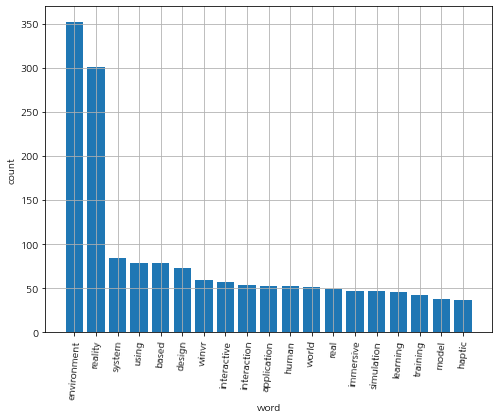

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show()